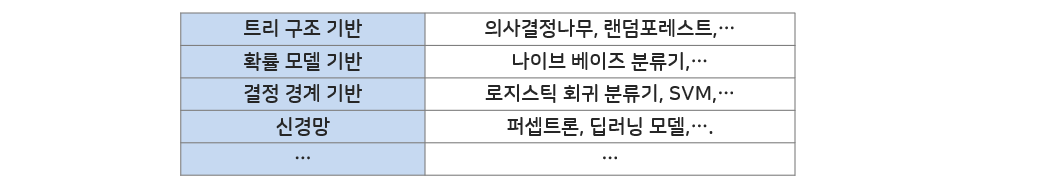

# 결정 트리(Decision Tree)

* 스무고개와 같이 특정 질문들을 통해 정답을 찾아가는 모델입니다. 
* 최상단의 뿌리마디에서 마지막 끝 마디까지 아래 방향으로 성장합니다. 
* 질문을 할 대상, 즉 일부 특성을 무작위로 고른 다음 이중에서 최선의 분할을 찾으며 트리를 만듭니다. 
* 최선의 분할은 데이터가 균일해지도록 (순도가 높아짐, 불순도가 낮아짐) 분리기준을 잡습니다. 
* 불순도(Impurity)값에 의해 분리됩니다. 

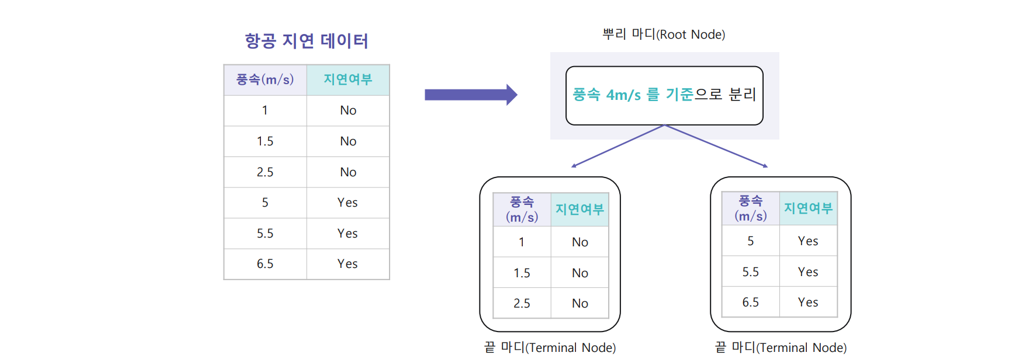

---

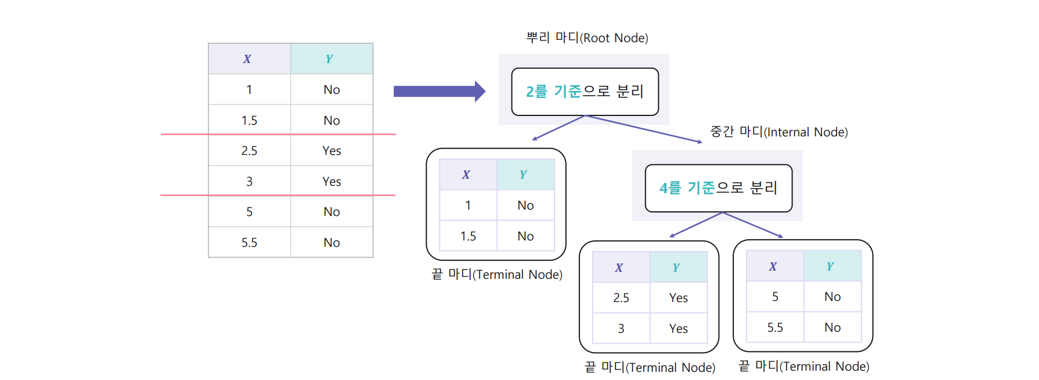

```
분리기준에 따라 결정트리의 성능이 좌우된다고 하는데
그럼,분리기준은 어떻게 정해지는 것일까?
```

### 분리기준

* 불순도 : 다른 데이터가 섞여 있는 정도
* 지니 불순도(Gini Impurity)가 가장 낮은값을 갖는 기준으로 결정트리를 성장시킵니다. 
* 정보이득(Information Gain)이 높은 값을 갖는 기준으로 결정트리를 성장시킵니다. 
    * 정보이득 = 1- 엔트로피(혼잡도)


* 즉, 불순한 것이 사라지도록 또는 정보가 점점 순수해져 분명하게 얻는 정보가 많아지도록 분리 기준을 잡습니다.   


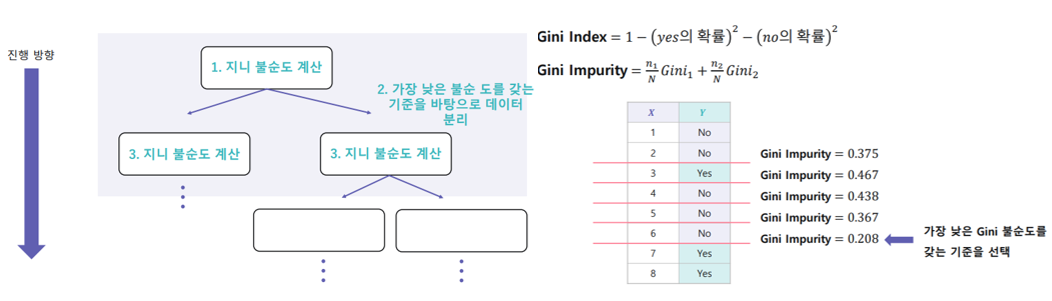

---

In [14]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

0.9666666666666667
0.9333333333333333


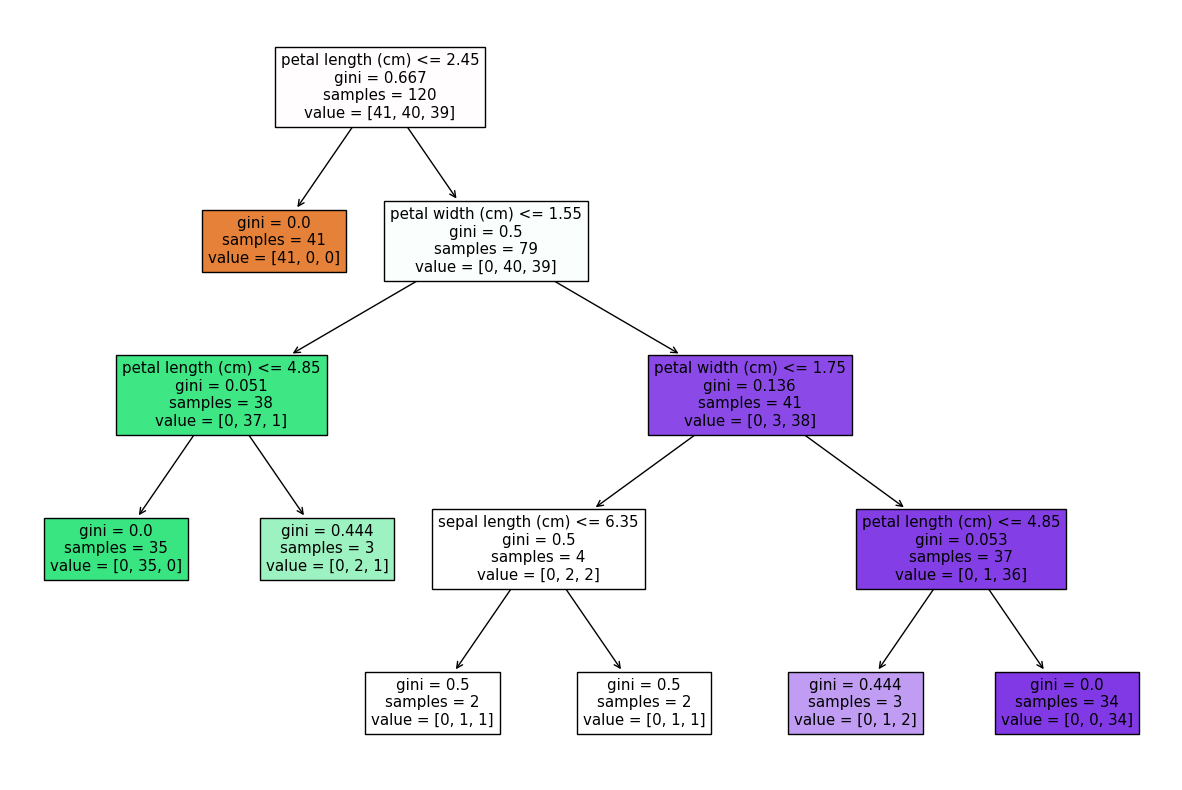

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

##########데이터 로드
iris_data = load_iris()


##########데이터 분석

##########데이터 전처리

x_train , x_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

##########모델 생성

# model = DecisionTreeClassifier(random_state=156,max_depth=3) # 트리성장 깊이 조절 max_depth : 하이퍼파라미터 -> 머신러닝, 딥러닝에서 학스을 할 때 개발자가 학습 정도를 조절하는데 사용하는 파라미터
# model = DecisionTreeClassifier(random_state=156,min_samples_leaf=5) # 리프노드의 최소 샘플 수 (리프노드가 5개일때까지 성장하라 => value = [0,3,5], [0,0,5])
model = DecisionTreeClassifier(random_state=111,min_samples_leaf=2,max_depth=4) # 리프노드 & 트리성장 깊이 조절 중 어느것이 우선?

# 하이퍼파라미터 중에는 기능적으로 상충 및 중복기능이 있을 수 있는데, 그 중 우선권을 가지는 파라미터가 있다.
# 여러개의 하이퍼파라미터를 사용할 때, 중복의미를 가지지는 않는지 확인 하자

##########모델 학습
model.fit(x_train , y_train)


##########모델 검증

print(model.score(x_train, y_train))
print(model.score(x_test, y_test)) 


##########모델 예측

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names=iris_data.feature_names)

plt.show()

```
[장점]
* 해석이 직관적이고 쉽습니다.
* 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않습니다.  --> 아주 큰 장점~~~~~


[단점]
* 과적합으로 알고리즘 성능이 떨어집니다.
* 이를 극복하기 위해서 트리의 크기나 리프노드의 샘플 수 등 파라미터들을 제한하는 튜닝이 필요합니다. 

```

---

### 결정트리의 부가기능(Feature importance)

* 결정트리는 분류예측 외에 피처 중요도 정보를 제공합니다. 
* 결정트리가 자동으로 분리기준을 찾고 분리해 나가면서 자주 사용되는 피처가 있습니다. 
* 이는 클래스의 값 결정에 영향을 많이 끼친다고 볼 수 있습니다. 
* 모델 학습에 영향도가 높은 피처들만 선택하여 학습시키고자 할 때 결정트리가 사용됩니다. 

In [31]:
#피처 중요도 정보
model.feature_importances_

array([0.        , 0.        , 0.55387887, 0.44612113])

In [32]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

> * 붓꽃 종류를 결정하는 데 있어 가장 중요한 특성은 petal length이다. 
> * 지금은 피쳐의 수가 적지만, 
> * 피처의 수가 굉장히 많아 이 때문에 모델을 만드는데 시간과 자원이 많이 필요하고, 과적합도 쉽게 발생된다면
> * 중요한 피처만 남겨 처리하고 싶어집니다. 
> * 이때 트리계열의 클래스(알고리즘)을 사용하여 피쳐 중요도를 파악해 피쳐 셀렉션을 진행할 수 있다.


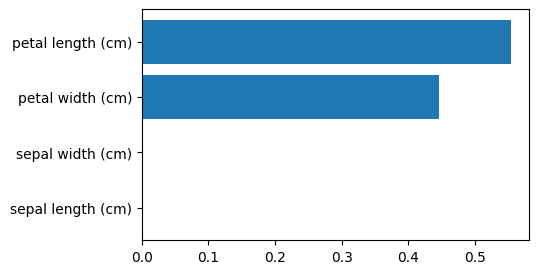

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# feature importance를 column 별로 시각화 하기 
# sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

rank = pd.Series(data=model.feature_importances_,index=iris_data.feature_names).sort_values(ascending=True)

plt.figure(figsize=(5,3))
plt.barh(rank.index,rank.values)
plt.yticks(rank.index)
plt.show()

---

### 결정트리의 하이퍼파라미터

* 결정트리를 사용하는데 있어 사람이 설정할 수 있는 파라미터가 있습니다.
* 이것을 **```하이퍼파라미터```** 라고 합니다. 
* 트리가 너무 많이 성장해 모델이 복잡해지고 이것은 과적합을 일으킵니다. 
* 그래서 어느 정도 일반화를 반영할 수 있는 선에서 트리의 성장을 중단시켜야 하는데,
* 중단시키기 위한 여러가지 파라미터가 있습니다. 
* 아래의 파라미터를 보고 상황에 맞게 사용하면 됩니다. 

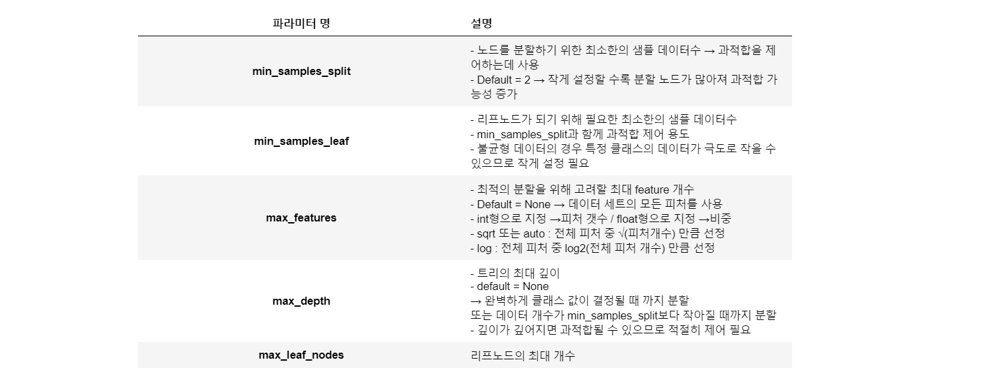